In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.svm import SVR
from scipy.optimize import fsolve

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Prueba de Hipótesis usando Análisis Inteligente de Datos

## Carga de los datos

In [2]:
# Lectura de la data
df_ferrara = pd.read_csv('./docs/ferrara_270615.csv', parse_dates=['day'])
df_milano = pd.read_csv('./docs/milano_270615.csv', parse_dates=['day'])
df_mantova = pd.read_csv('./docs/mantova_270615.csv', parse_dates=['day'])
df_ravenna = pd.read_csv('./docs/ravenna_270615.csv', parse_dates=['day'])
df_torino = pd.read_csv('./docs/torino_270615.csv', parse_dates=['day'])
df_asti = pd.read_csv('./docs/asti_270615.csv', parse_dates=['day'])
df_bologna = pd.read_csv('./docs/bologna_270615.csv', parse_dates=['day'])
df_piacenza = pd.read_csv('./docs/piacenza_270615.csv', parse_dates=['day'])
df_cesena = pd.read_csv('./docs/cesena_270615.csv', parse_dates=['day'])
df_faenza = pd.read_csv('./docs/faenza_270615.csv', parse_dates=['day'])

In [3]:
# Revisar Shape de la data
print(f'Shape de df_ferrara {df_ferrara.shape}')
print(f'Shape de df_milano {df_milano.shape}')
print(f'Shape de df_mantova {df_mantova.shape}')
print(f'Shape de df_ravenna {df_ravenna.shape}')
print(f'Shape de df_torino {df_torino.shape}')
print(f'Shape de df_asti {df_asti.shape}')
print(f'Shape de df_bologna {df_bologna.shape}')
print(f'Shape de df_piacenza {df_piacenza.shape}')
print(f'Shape de df_cesena {df_cesena.shape}')
print(f'Shape de df_faenza {df_faenza.shape}')

Shape de df_ferrara (20, 11)
Shape de df_milano (18, 11)
Shape de df_mantova (20, 11)
Shape de df_ravenna (18, 11)
Shape de df_torino (20, 11)
Shape de df_asti (20, 11)
Shape de df_bologna (20, 11)
Shape de df_piacenza (20, 11)
Shape de df_cesena (20, 11)
Shape de df_faenza (19, 11)


## Análisis iniciales

Un análisis inicial de los datos es conocer la tendencia de la temperatura durante el día. Tomando Milán como ejemplo se obtiene una gráfica rápida.
Sin embargo, nos interesa ver de forma gráfica como es la tendencia de temperatura entre ciudades lejanas al mar y las cercanas.

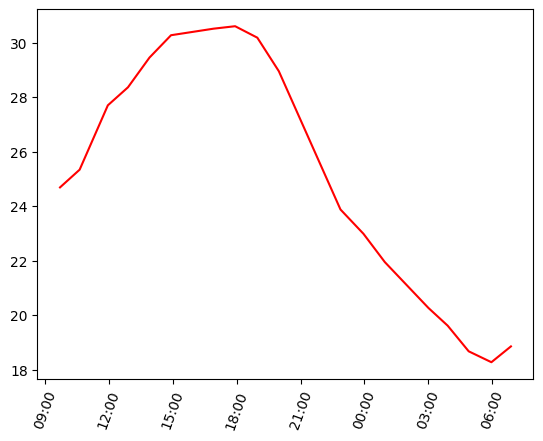

In [4]:
y1 = df_milano['temp']
x1 = df_milano['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
ax.plot(x1, y1, 'r')

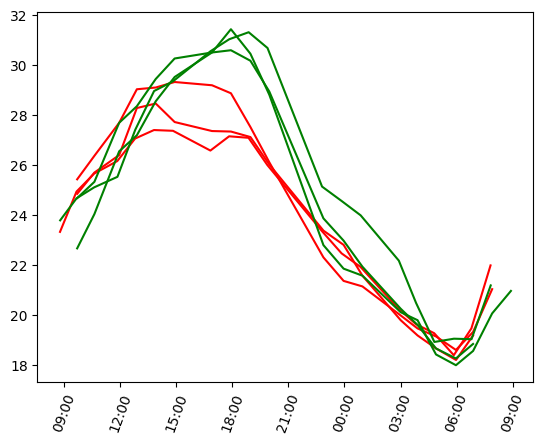

In [5]:
# Las tres ciudades más cercanas al mar, linea roja
y1 = df_ravenna['temp']
x1 = df_ravenna['day']
y2 = df_faenza['temp']
x2 = df_faenza['day']
y3 = df_cesena['temp']
x3 = df_cesena['day']
# Las tres ciudades más lejanas al mar, línea verde
y4 = df_milano['temp']
x4 = df_milano['day']
y5 = df_asti['temp']
x5 = df_asti['day']
y6 = df_torino['temp']
x6 = df_torino['day']
# Visualización de datos
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1, y1, 'r', x2, y2, 'r', x3, y3, 'r')
plt.plot(x4, y4, 'g', x5, y5, 'g', x6, y6, 'g')

Bueno, si observamos la gráfica, los resultados parecen prometedores. De hecho, las tres ciudades más cercanas tienen temperaturas máximas muy inferiores a las más alejadas, mientras que en cuanto a las temperaturas mínimas parece que no hay diferencia para ninguna de las ciudades.
Para profundizar en este aspecto, recogerás todas las temperaturas máximas y mínimas de las diez ciudades para mostrar un gráfico de líneas que establece las temperaturas máximas y mínimas en relación a la distancia al mar.

In [6]:
dist = [df_ravenna['dist'][0],
        df_cesena['dist'][0],
        df_faenza['dist'][0],
        df_ferrara['dist'][0],
        df_bologna['dist'][0],
        df_mantova['dist'][0],
        df_piacenza['dist'][0],
        df_milano['dist'][0],
        df_asti['dist'][0],
        df_torino['dist'][0]
        ]
temp_max = [df_ravenna['temp'].max(),
            df_cesena['temp'].max(),
            df_faenza['temp'].max(),
            df_ferrara['temp'].max(),
            df_bologna['temp'].max(),
            df_mantova['temp'].max(),
            df_piacenza['temp'].max(),
            df_milano['temp'].max(),
            df_asti['temp'].max(),
            df_torino['temp'].max()
            ]

temp_min = [df_ravenna['temp'].min(),
            df_cesena['temp'].min(),
            df_faenza['temp'].min(),
            df_ferrara['temp'].min(),
            df_bologna['temp'].min(),
            df_mantova['temp'].min(),
            df_piacenza['temp'].min(),
            df_milano['temp'].min(),
            df_asti['temp'].min(),
            df_torino['temp'].min()
            ]

print(f'Distancias: {dist}')
print(f'Temeraturas máximas por ciudad: {temp_max}')
print(f'Temeraturas Mínimas por ciudad: {temp_min}')

Distancias: [8, 14, 37, 47, 71, 121, 200, 250, 315, 357]
Temeraturas máximas por ciudad: [28.470000000000027, 27.410000000000025, 29.33000000000004, 30.33000000000004, 30.96000000000004, 30.57000000000005, 30.890000000000043, 30.600000000000023, 31.44, 31.32000000000005]
Temeraturas Mínimas por ciudad: [18.220000000000027, 18.410000000000025, 18.620000000000005, 18.81, 18.44, 19.03000000000003, 18.680000000000007, 18.28000000000003, 18.010000000000048, 18.94]


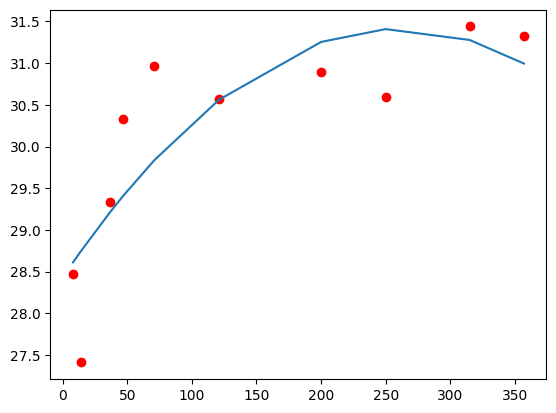

In [7]:
plt.plot(dist, temp_max, 'ro')
z = np.polyfit(dist, temp_max, 2)
p = np.poly1d(z)
plt.plot(dist, p(dist))
plt.show()

Se observa que después de la tercera ciudad más cercana (~37 km) la temperatura máxima va creciendo. Ya después de ~50km la temperatura se mantiene en una meseta. Esto comprueba de forma empírica la hipótesis 1.

Si se usa Support Vector Machine, específicamente support vector regression, se podrían observar dos tendencias en la gráfica.

## Análisis detallado temperaturas máximas

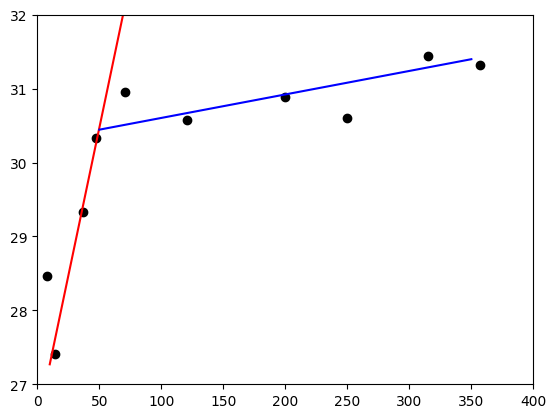

In [8]:
svr_lin1 = SVR(kernel='linear', C=1e3)
svr_lin2 = SVR(kernel='linear', C=1e3)
# SVR.fit requiere que X sea un arreglo [,1]
x1 = np.array(dist[:4]).reshape(-1, 1)
y1 = np.array(temp_max[:4])

x2 = np.array(dist[4:]).reshape(-1, 1)
y2 = np.array(temp_max[4:])

svr_lin1.fit(x1, y1)
svr_lin2.fit(x2, y2)
xp1 = np.arange(10, 100, 10).reshape((9, 1))
xp2 = np.arange(50, 400, 50).reshape((7, 1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)
plt.plot(xp1, yp1, c='r', label='Strong sea effect')
plt.plot(xp2, yp2, c='b', label='Light sea effect')
plt.axis((0, 400, 27, 32))
plt.scatter(dist, temp_max, c='k', label='data')

Como puede ver, el aumento de la temperatura durante los primeros 60 km es muy rápido, pasando de 28 a 31 grados, y luego aumenta muy levemente (si es que aumenta) en distancias más largas. Las dos tendencias están descritas por dos líneas rectas que tienen la expresión $x=ax+b$

El punto de instersección de las dos líneas podría considerarse el punto donde el mar tiene mucha influencia y donde ya no tiene tanta relevancia. Entonces, hay que resolver $f(x_1) = f(x_2)$.


In [9]:
print(f'Vector 1 (rojo) a={svr_lin1.coef_} y b={svr_lin1.intercept_}')
print(f'Vector 2 (azul) a={svr_lin2.coef_} y b={svr_lin2.intercept_}')

Vector 1 (rojo) a=[[0.08]] y b=[26.47]
Vector 2 (azul) a=[[0.00317797]] y b=[30.2854661]


[x,y] = [ 49 , 30 ]
El efecto del mar para la temperatura máxima desaparece a los 49 km


C:\Users\josea\AppData\Local\Temp\ipykernel_14080\3505394043.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("[x,y] = [ %d , %d ]" % (result, line1(result)))
C:\Users\josea\AppData\Local\Temp\ipykernel_14080\3505394043.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('El efecto del mar para la temperatura máxima desaparece a los %d km' % result)


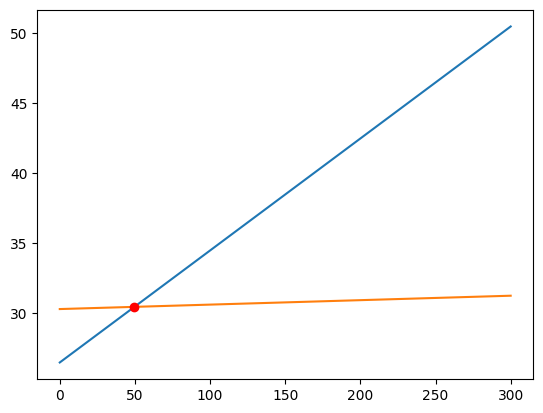

In [10]:
def line1(x):
    a1 = -svr_lin1.coef_[0][0]
    b1 = svr_lin1.intercept_[0]
    return -a1*x + b1


def line2(x):
    a1 = -svr_lin2.coef_[0][0]
    b1 = svr_lin2.intercept_[0]
    return -a1*x + b1


def findIntersection(fun1, fun2, x0):
    return fsolve(lambda x: fun1(x) - fun2(x), x0)


result = findIntersection(line1, line2, 0.0)

print("[x,y] = [ %d , %d ]" % (result, line1(result)))
print('El efecto del mar para la temperatura máxima desaparece a los %d km' % result)
x = np.linspace(0, 300, 31)
plt.plot(x, line1(x), x, line2(x), result, line1(result), 'ro')

Ahora, se analizan las temperaturas mínimas, para ver si tiene un efecto el mar.

## Análisis temperaturas mínimas

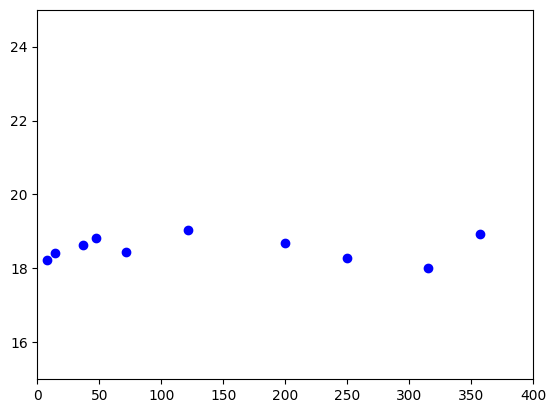

In [11]:
plt.axis((0, 400, 15, 25))
plt.plot(dist, temp_min, 'bo')

## Análisis humedad

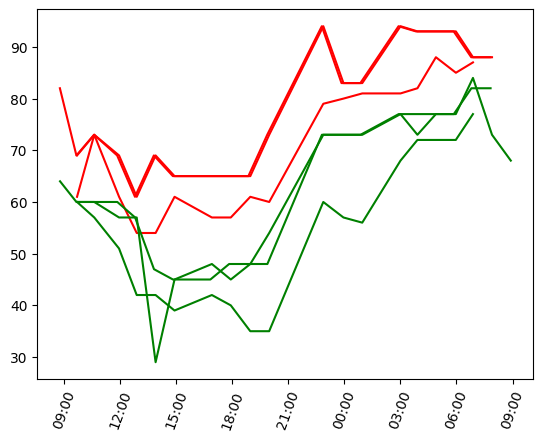

In [12]:
y1 = df_ravenna['humidity']
x1 = df_ravenna['day']
y2 = df_faenza['humidity']
x2 = df_faenza['day']
y3 = df_cesena['humidity']
x3 = df_cesena['day']
y4 = df_milano['humidity']
x4 = df_milano['day']
y5 = df_asti['humidity']
x5 = df_asti['day']
y6 = df_torino['humidity']
x6 = df_torino['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1, y1, 'r', x2, y2, 'r', x3, y3, 'r')
plt.plot(x4, y4, 'g', x5, y5, 'g', x6, y6, 'g')

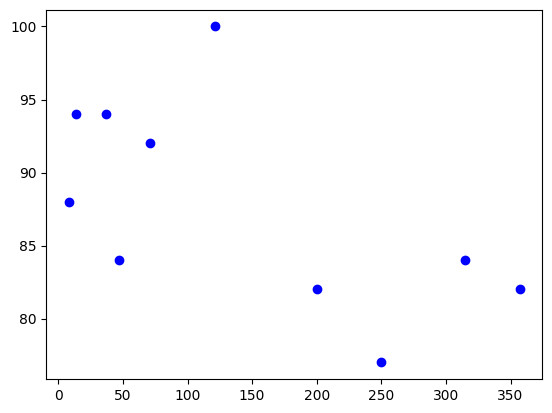

In [13]:
# humedad máxima
hum_max = [df_ravenna['humidity'].max(),
           df_cesena['humidity'].max(),
           df_faenza['humidity'].max(),
           df_ferrara['humidity'].max(),
           df_bologna['humidity'].max(),
           df_mantova['humidity'].max(),
           df_piacenza['humidity'].max(),
           df_milano['humidity'].max(),
           df_asti['humidity'].max(),
           df_torino['humidity'].max()
           ]
plt.plot(dist, hum_max, 'bo')

## Análisis del viento

Se puede analizar la dirección y la velocidad del viento, y son datos que se tienen a la mano.
Al realizar un plot cartesiano, se observa que no es muy efectivo para observar alguna tendencia.

Al ser un dato radial, es mejor una distribución de puntos en 360 grados, usando el **chart polar**.

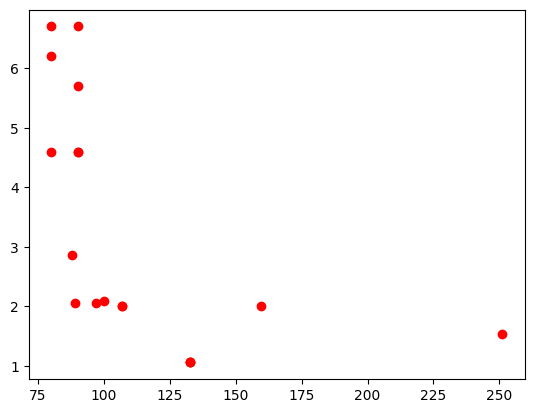

In [14]:
# ejemplo de plot para observar una relación entre dirección y velocidad
plt.plot(df_ravenna['wind_deg'], df_ravenna['wind_speed'], 'ro')

In [15]:
# crear el histograma sobre los 360 grados, divididos en 45°
hist, bins = np.histogram(df_ravenna['wind_deg'], 8, [0, 360])
print(hist)
print(bins)

[ 0  5 11  1  0  1  0  0]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


In [16]:
def showRoseWind(values, city_name, max_value):
    N = 8
    theta = np.arange(0., 2 * np.pi, 2 * np.pi / N)
    radii = np.array(values)
    plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
    colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in radii]
    plt.bar(theta, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
    plt.title(city_name, x=0.2, fontsize=20)

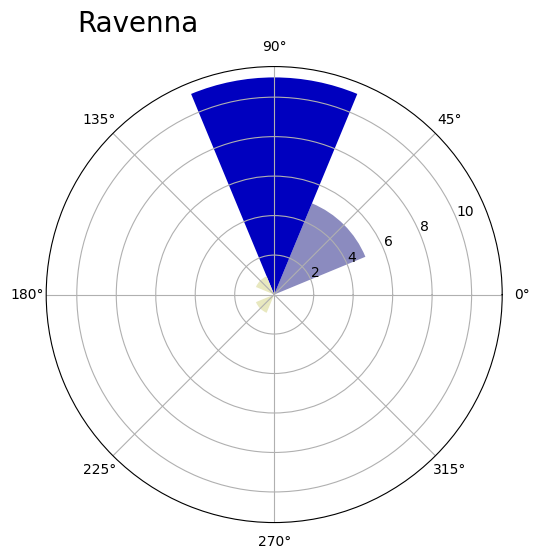

In [17]:
showRoseWind(hist, 'Ravenna', max(hist))

[Text(0.5, 1.0, 'Ravenna')]

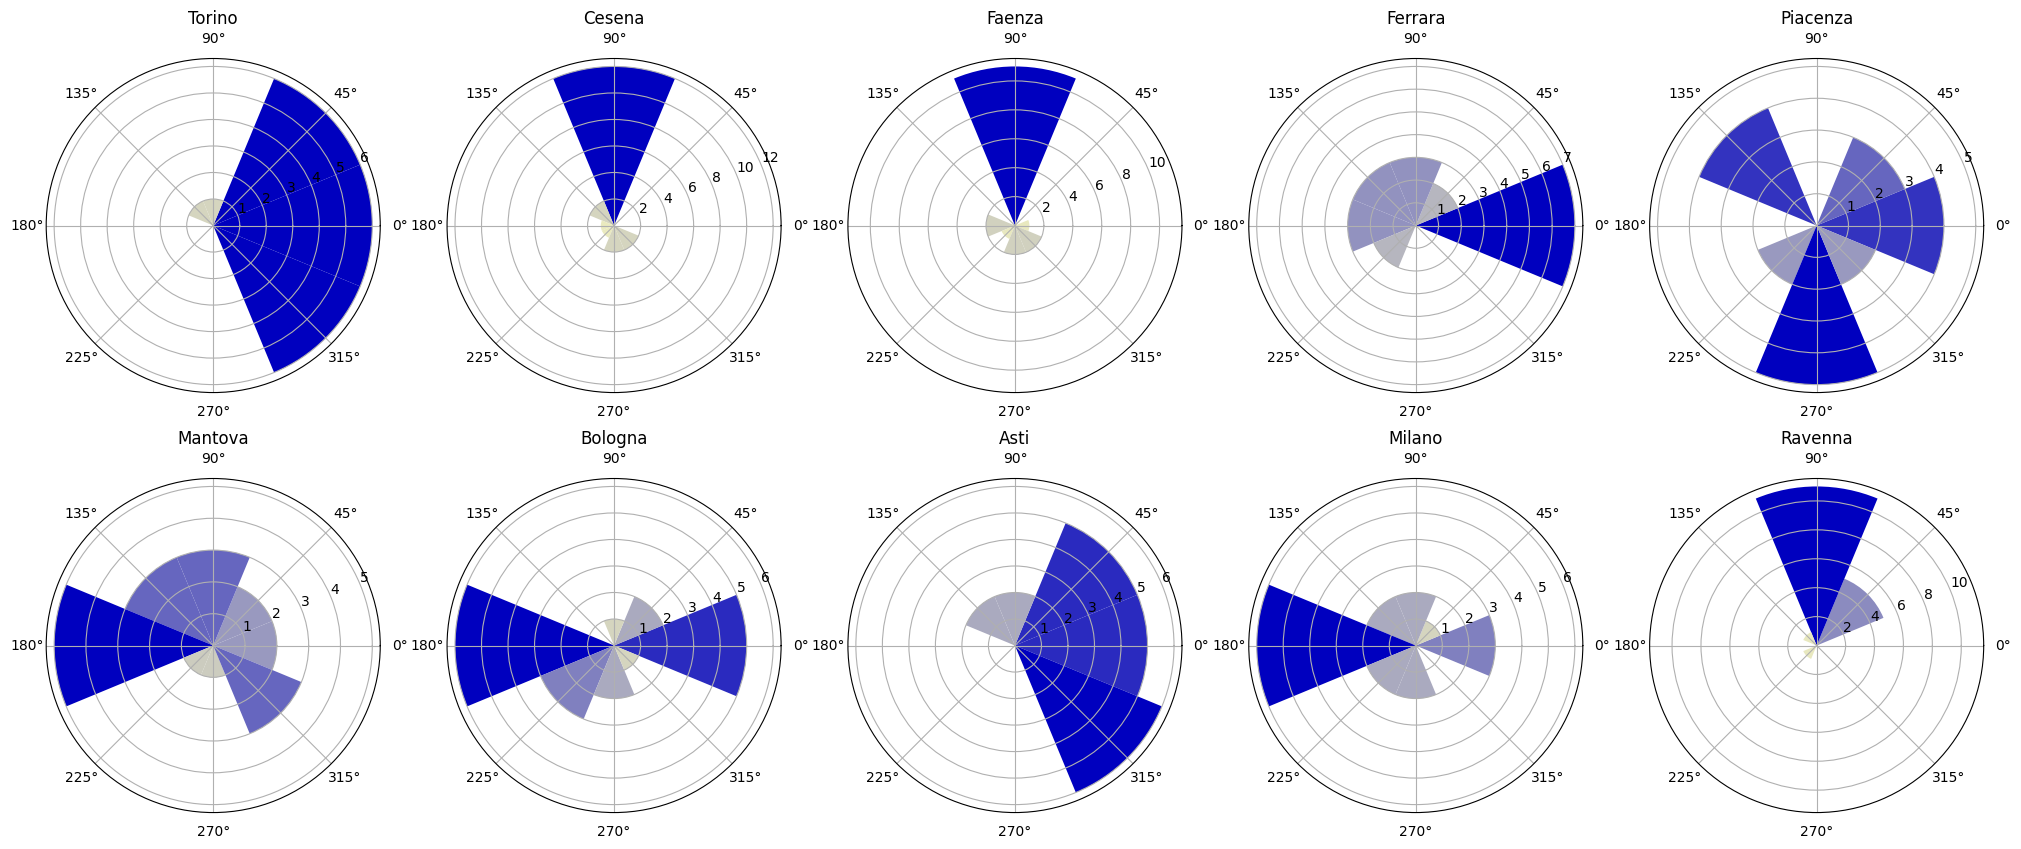

In [18]:
N = 8
theta = np.arange(0., 2 * np.pi, 2 * np.pi / N)
radii = np.array(hist)


fig, axes = plt.subplots(2, 5, subplot_kw=dict(polar=True), figsize=(25, 10))

hist, bins = np.histogram(df_torino['wind_deg'], 8, [0, 360])
max_value = max(hist)
colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in np.array(hist)]
axes[0, 0].bar(theta, np.array(hist), width=(
    2*np.pi/N), bottom=0.0, color=colors)
axes[0, 0].set(title='Torino')

hist, bins = np.histogram(df_cesena['wind_deg'], 8, [0, 360])
max_value = max(hist)
colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in np.array(hist)]
axes[0, 1].bar(theta, np.array(hist), width=(
    2*np.pi/N), bottom=0.0, color=colors)
axes[0, 1].set(title='Cesena')

hist, bins = np.histogram(df_faenza['wind_deg'], 8, [0, 360])
max_value = max(hist)
colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in np.array(hist)]
axes[0, 2].bar(theta, np.array(hist), width=(
    2*np.pi/N), bottom=0.0, color=colors)
axes[0, 2].set(title='Faenza')

hist, bins = np.histogram(df_ferrara['wind_deg'], 8, [0, 360])
max_value = max(hist)
colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in np.array(hist)]
axes[0, 3].bar(theta, np.array(hist), width=(
    2*np.pi/N), bottom=0.0, color=colors)
axes[0, 3].set(title='Ferrara')

hist, bins = np.histogram(df_piacenza['wind_deg'], 8, [0, 360])
max_value = max(hist)
colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in np.array(hist)]
axes[0, 4].bar(theta, np.array(hist), width=(
    2*np.pi/N), bottom=0.0, color=colors)
axes[0, 4].set(title='Piacenza')

hist, bins = np.histogram(df_mantova['wind_deg'], 8, [0, 360])
max_value = max(hist)
colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in np.array(hist)]
axes[1, 0].bar(theta, np.array(hist), width=(
    2*np.pi/N), bottom=0.0, color=colors)
axes[1, 0].set(title='Mantova')

hist, bins = np.histogram(df_bologna['wind_deg'], 8, [0, 360])
max_value = max(hist)
colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in np.array(hist)]
axes[1, 1].bar(theta, np.array(hist), width=(
    2*np.pi/N), bottom=0.0, color=colors)
axes[1, 1].set(title='Bologna')

hist, bins = np.histogram(df_asti['wind_deg'], 8, [0, 360])
max_value = max(hist)
colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in np.array(hist)]
axes[1, 2].bar(theta, np.array(hist), width=(
    2*np.pi/N), bottom=0.0, color=colors)
axes[1, 2].set(title='Asti')

hist, bins = np.histogram(df_milano['wind_deg'], 8, [0, 360])
max_value = max(hist)
colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in np.array(hist)]
axes[1, 3].bar(theta, np.array(hist), width=(
    2*np.pi/N), bottom=0.0, color=colors)
axes[1, 3].set(title='Milano')

hist, bins = np.histogram(df_ravenna['wind_deg'], 8, [0, 360])
max_value = max(hist)
colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in np.array(hist)]
axes[1, 4].bar(theta, np.array(hist), width=(
    2*np.pi/N), bottom=0.0, color=colors)
axes[1, 4].set(title='Ravenna')